In [1011]:
import warnings
warnings.filterwarnings('ignore')

In [1012]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1013]:
from IPython.display import display
pd.options.display.max_columns = None


In [1014]:
#importing all datasets
df_lead = pd.read_csv(r"C:\Users\prath\OneDrive\Documents\priyanka\Lead Scoring Assignment\Leads.csv")


In [1015]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1016]:
df_lead.shape

(9240, 37)

In [1017]:
#checking info
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1018]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**data quality check and cleaning**

In [1020]:
#customer had not selected option while filling form so lets replace select with Nan value
df_lead = df_lead.replace('Select', np.nan)

In [1021]:
#checking null values
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1022]:
#checking the percentage of null values
percent= round(100*(df_lead.isnull().sum()/len(df_lead)),2)
print(percent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1023]:
#creating copy of original data
df_lead1= df_lead.copy()

**missing value treatment**

In [1025]:
#droping all the columns having missing values more than 38%
for col in df_lead1.columns:
    if df_lead1[col].isnull().sum()/df_lead1.shape[0]*100 > 38:
        df_lead1.drop(col, inplace= True, axis = 1)
    

In [1026]:
#check the number of null values again
df_lead1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [1027]:
df_lead1.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [1028]:
#imputing missing value with 'others'
df_lead1['Specialization'].fillna('others', inplace = True)

In [1029]:
#checking value counts of lead source
df_lead1['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [1030]:
#there are two 'google' and 'Google' . so replacing 'google' with 'Google'
df_lead1['Lead Source']= df_lead1['Lead Source'].replace('google', 'Google')

In [1031]:
#verifying
df_lead1['Lead Source'].value_counts()


Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [1032]:
#'Google' is having higesh number of occurence so imputing missing value with 'Google'
df_lead1['Lead Source'].fillna('Google', inplace= True)

In [1033]:
#for 'Total Visits'' and 'Page Views Per Visit', imputing missing values with median 
df_lead1['TotalVisits'].fillna(df_lead1['TotalVisits'].median(), inplace= True)

df_lead1['Page Views Per Visit'].fillna(df_lead1['Page Views Per Visit'].median(), inplace= True)                                

In [1034]:
#checking value counts of last activity 
df_lead1['Last Activity'].value_counts()


Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [1035]:
#most frequent value is email opend so relacing null values with Email Opened
df_lead1['Last Activity'].fillna('Email Opened', inplace= True)

In [1036]:
#dropping column Country and Tags
df_lead1.drop('Country', inplace= True, axis=1)

In [1037]:
df_lead1.drop('Tags', inplace= True, axis=1)

In [1038]:
df_lead1['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [1039]:
#replacing null values with 'Better Career Prospects'
df_lead1['What matters most to you in choosing a course'].fillna('Better Career Prospects ', inplace= True)

In [1040]:
df_lead1['What is your current occupation'].value_counts()


What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [1041]:
#creating asperate category 'Others' 
df_lead1['What is your current occupation'].fillna('Others', inplace= True)

In [1042]:
 #checking null values again
df_lead1.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

there is no missing values

In [1044]:
#dropping column 'Prospect ID' and ' Lead Number' 
df_lead1.drop(['Prospect ID','Lead Number'],axis= 1, inplace= True)

*checking data imbalancing*

In [1046]:
cols= list(df_lead1.iloc[:,:])
for i in cols :
    print(i,'======')
    print(df_lead1[i].value_counts, '\n')

Lead Origin ======
<bound method IndexOpsMixin.value_counts of 0                           API
1                           API
2       Landing Page Submission
3       Landing Page Submission
4       Landing Page Submission
                 ...           
9235    Landing Page Submission
9236    Landing Page Submission
9237    Landing Page Submission
9238    Landing Page Submission
9239    Landing Page Submission
Name: Lead Origin, Length: 9240, dtype: object> 

Lead Source ======
<bound method IndexOpsMixin.value_counts of 0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object> 

Do Not Email ======
<bound method IndexOpsMixin.value_counts of 0        No
1        No
2        No
3        No
4        No
       ... 
9235    Yes
9236     No
9237    Y

In [1047]:
#dropping the columns which are having highly data imbalance and columns which will not  contribute significantly to analysis
df_lead1.drop(['Do Not Call','Through Recommendations','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Digital Advertisement','Receive More Updates About Our Courses','Update me on Supply Chain Content',
               'Get updates on DM Content','I agree to pay the amount through cheque','Last Notable Activity'], axis=1, inplace= True)

In [1048]:
df_lead1.shape

(9240, 11)

In [1049]:
df_lead1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,No


**EDA**

In [1051]:
#calculationg conversion rate
converted= (sum(df_lead1['Converted'])/len(df_lead1['Converted'].index))*100
print(converted)

38.53896103896104


In [1052]:
df_lead1['Lead Source'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object>

In [1053]:
#clubbing lower frequency values together under a common label 'others'
df_lead1['Lead Source']= df_lead1['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLeran','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'], 'Others')

UNIVARIATE ANALYSIS

In [1055]:
def mplot(df, col, title, hue= None):
    plt.figure(figsize=(20,5))
    temp = pd.Series(data = hue)
    df[hue] = df[hue].astype(str)
    
    plt.xticks(rotation=90)
    
    plt.title(title)
    ax= sns.countplot(data=df, x= col,  hue= hue)
    
    plt.show()
    

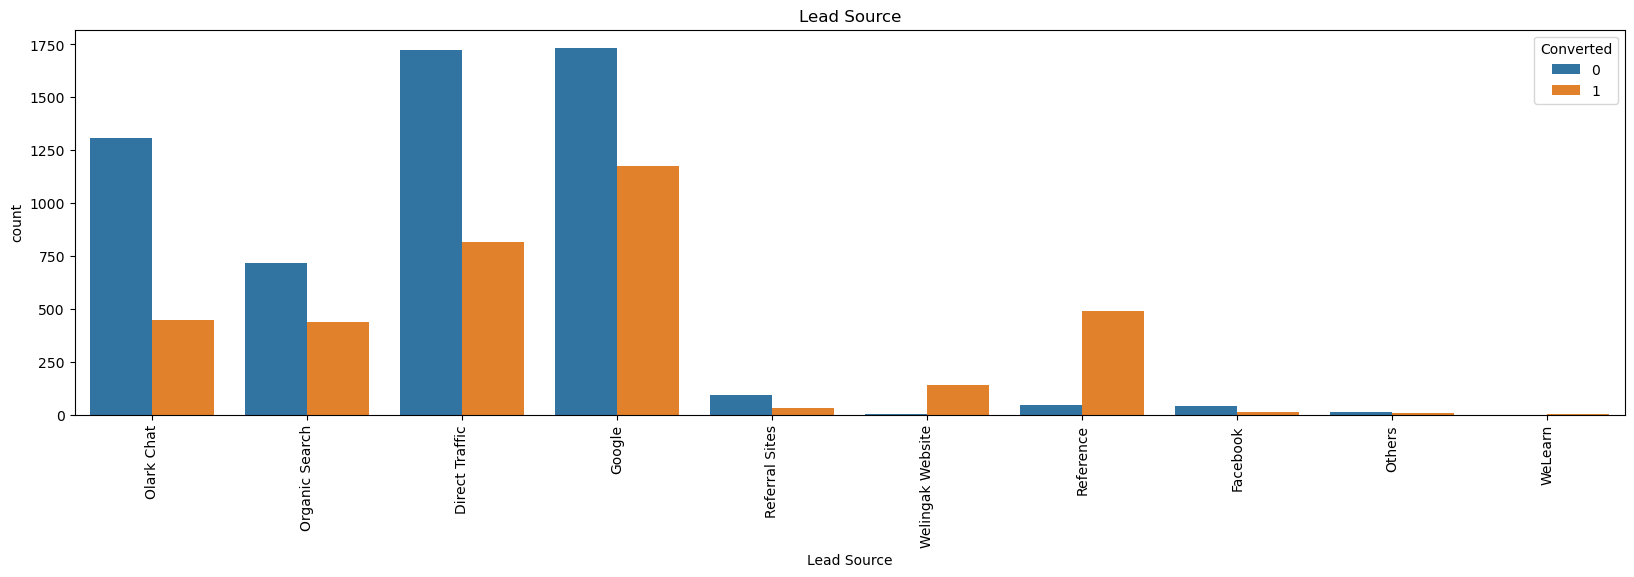

In [1056]:
mplot(df_lead1, col= 'Lead Source', title= 'Lead Source', hue= 'Converted')

In [1057]:
#clubbing lower frequency values together under a common label 'others'
df_lead1['Last Activity']=df_lead1['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
'Approached upfront','Resubscribed to emails','Email Marked Spam'],'Others')



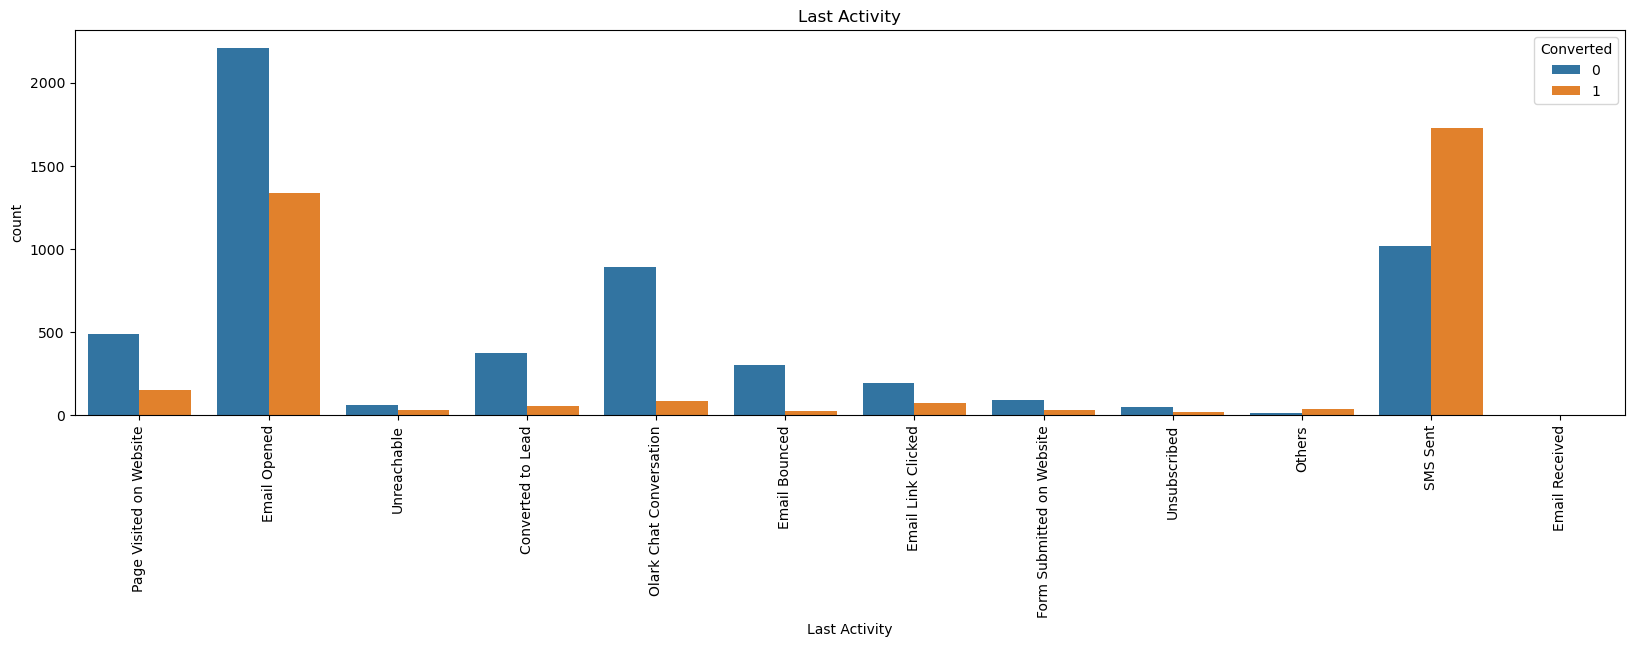

In [1058]:
mplot(df_lead1, col= 'Last Activity', title= 'Last Activity', hue= 'Converted')

In [1059]:
#conversion rate for last activity of 'SMS Sent' is high
#highest last activity is 'Email Opened'

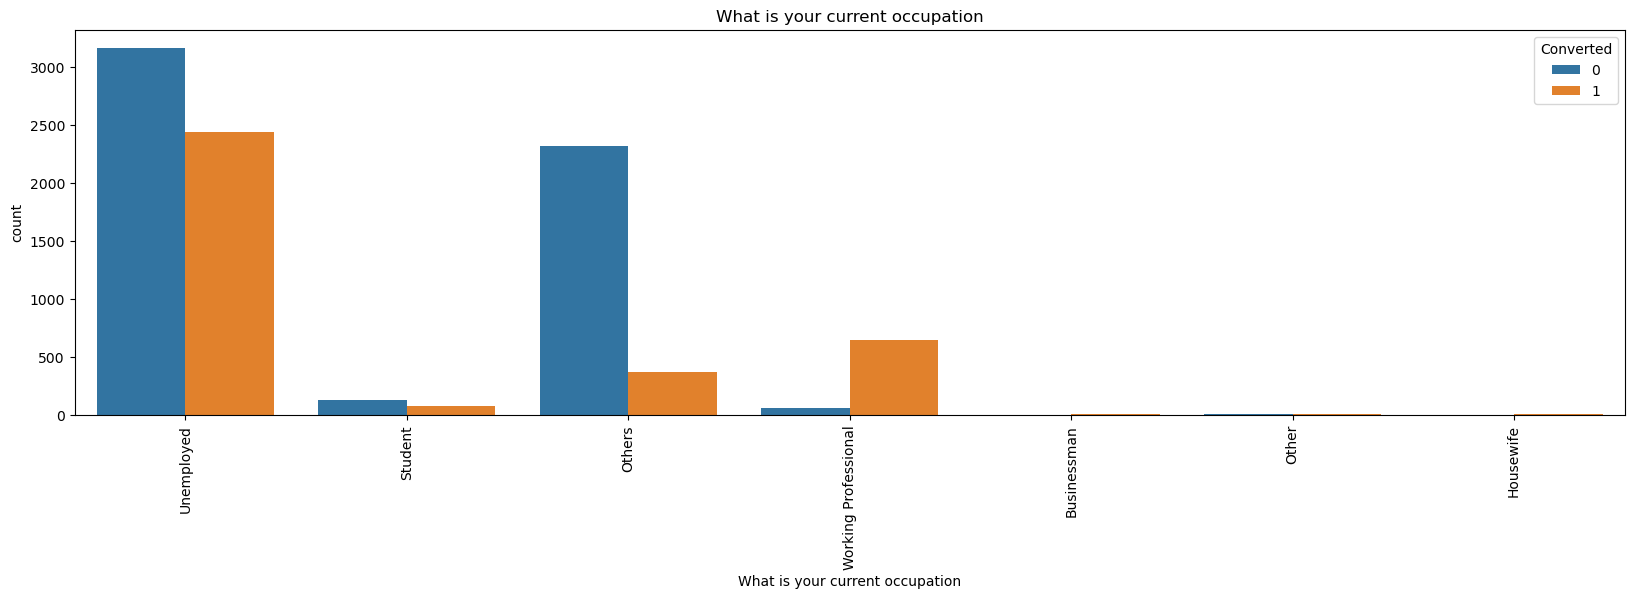

In [1060]:
mplot(df_lead1, col= 'What is your current occupation', title= 'What is your current occupation', hue= 'Converted')

In [1061]:
#'unemployed'are generating more number of leads
#coversion rate is higher for 'working professional'

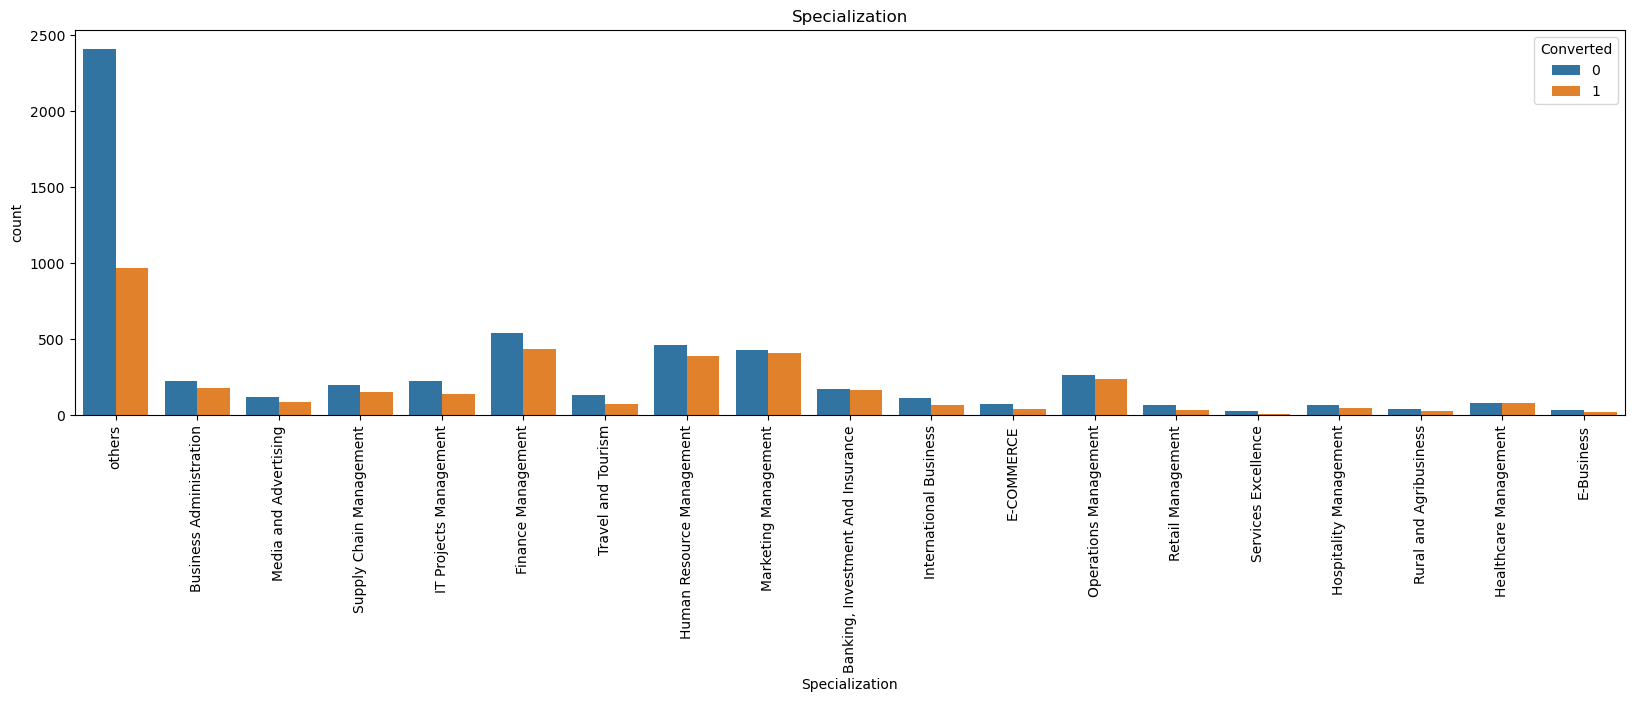

In [1062]:
mplot(df_lead1, col= 'Specialization', title= 'Specialization', hue= 'Converted')

In [1063]:
#others category generating more number of leads

**outliers Analysis**

In [1065]:
# Checking for outliers in the continuous variables
num_lead= df_lead1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [1066]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


there are upper range outliers in 'TotalVisits' and 'Page Views Per Visit' , so need to  treat outliers.

In [1068]:
#Treating upper range outliers by capping  upper range to 0.99
Q3= df_lead1.TotalVisits.quantile(0.99)
df_lead1= df_lead1[(df_lead1.TotalVisits <= Q3)]

In [1069]:
Q3= df_lead1['Page Views Per Visit'].quantile(0.99)
df_lead1= df_lead1[(df_lead1['Page Views Per Visit'] <= Q3)]

In [1070]:
 df_lead1['Converted'] = df_lead1['Converted'].astype(int)

BIVARIATE ANALYSIS

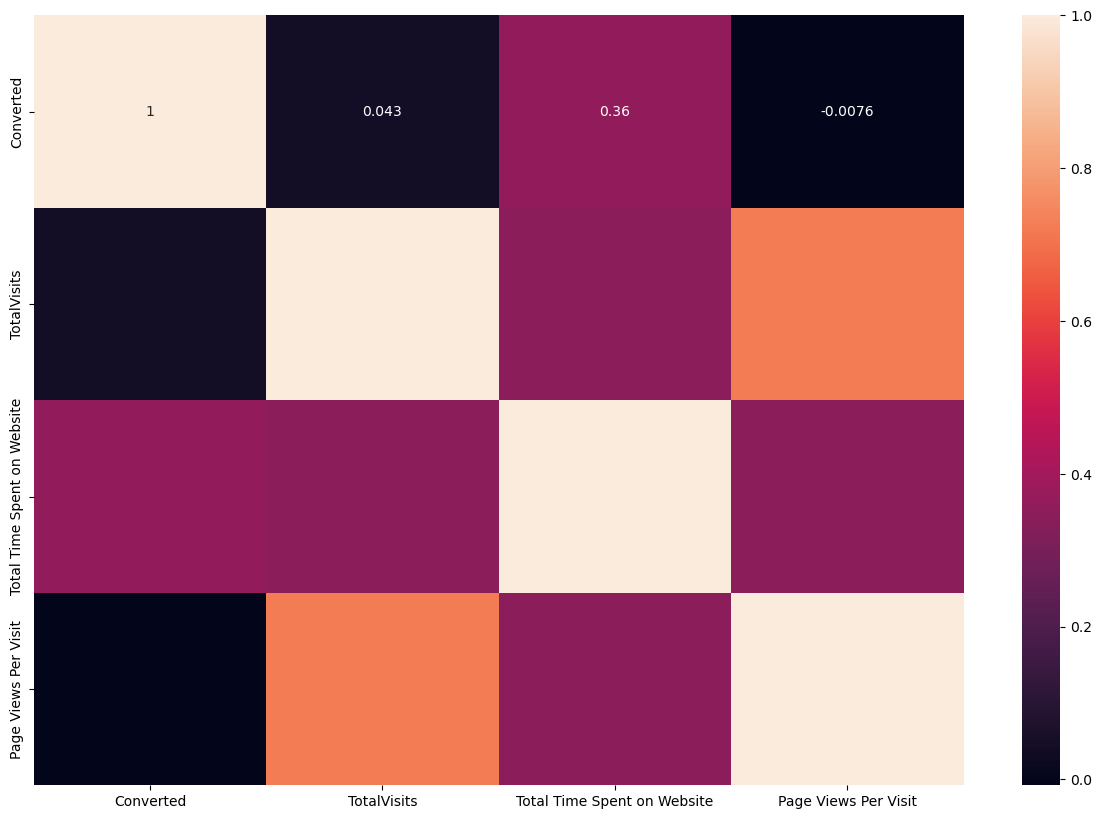

In [1072]:
# Let's see the correlation matrix 
plt.figure(figsize = (15,10))    

sns.heatmap(df_lead1.corr(numeric_only=True),annot = True)
plt.show()

'TotalVisits' and 'Page Views Per Visit' are highly correlated with correlation of 0.72

**Data Preparation**

In [1075]:
#converting binary variables to 1/0
vars= ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, 'No':0})
df_lead1[vars]= df_lead1[vars].apply(binary_map)    

In [1076]:
#checking dataframe
df_lead1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,0


**creating dummy variables**

In [1078]:
#creating list of categorical columns
temp = df_lead1.loc[:, df_lead1.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [1079]:
#creating dummy variables for  the categorical variables and dropping the first one
dummy= pd.get_dummies(df_lead1[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation']], drop_first= True,dtype= int)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [1080]:
#adding dummy variable dataset to orignal
df_lead1= pd.concat([dummy, df_lead1], axis=1)

In [1081]:
df_lead1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,API,Organic Search,0,0,5.0,674,2.5,Email Opened,others,Unemployed,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,0


In [1082]:
#dropping repeated columns
df_lead1.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Specialization'],axis=1, inplace= True)

In [1083]:
#checking shape of dataframe
df_lead1.shape

(9090, 54)

**Test- Train Split**

In [1085]:
#importing the required liabrary
from sklearn.model_selection import train_test_split

In [1086]:
#putting feature variable to x
X= df_lead1.drop(['Converted'], axis = 1)

X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,305,1.0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.0,1428,1.0,0


In [1087]:
#putting response variable to y
y= df_lead1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

In [1088]:
# Spliting the dataset into 70% train and 30% test, and set the random state to 100

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1089]:
X_train.shape

(6363, 53)

In [1090]:
X_test.shape

(2727, 53)

**Feature Scaling**

In [1092]:
#importing required liabrary
from sklearn.preprocessing import StandardScaler

In [1093]:
#screating scaler object
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
302,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1.336782,-0.428736,0.044021,0
6087,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,-1.094877,-0.887355,-1.206716,0
1033,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.642022,-0.025151,1.477269,0
7656,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.989402,-0.241619,2.014065,1
3241,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.294642,0.897591,-0.492776,1


**checking correlation**

In [1095]:
# Let's see the correlation 
df_lead1.corr()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Lead Origin_Landing Page Submission,1.000000,-0.307426,-0.081967,-0.011020,-0.079126,0.085539,-0.513515,0.052234,-0.004669,-0.262195,-0.075013,0.009984,-0.132344,0.062993,-0.030835,0.031441,0.014121,0.047887,-0.303172,-0.015937,0.086786,0.068787,0.031549,0.023182,0.134459,0.063682,0.077946,0.200692,0.061185,0.054981,0.157960,0.149244,0.095503,0.132431,0.101294,0.128487,0.076161,0.056134,0.051431,0.128796,0.109821,-0.749257,-0.001638,-0.001938,-0.087396,0.000589,0.086227,-0.007550,0.092187,-0.052359,0.431367,0.277364,0.536032,0.568421
Lead Origin_Lead Add Form,-0.307426,1.000000,-0.022832,-0.003069,-0.022832,-0.169296,-0.140969,-0.108128,0.036925,0.852872,-0.033415,-0.003069,0.430489,-0.029843,0.005289,0.022218,-0.004341,-0.018308,-0.094347,0.042400,-0.045998,0.105741,-0.004829,-0.008733,-0.012182,-0.012608,-0.020788,0.011102,0.015647,0.008673,0.029091,-0.036405,-0.025825,0.032053,-0.035279,-0.016646,-0.022047,-0.016441,-0.012634,-0.025554,-0.037050,0.030413,0.039536,-0.001085,-0.187715,0.010047,0.060588,0.198659,-0.019455,0.324947,-0.251111,-0.139267,-0.286211,-0.180110
Lead Origin_Lead Import,-0.081967,-0.022832,1.000000,-0.000818,0.981708,-0.050043,-0.038137,-0.028830,-0.003754,-0.019472,-0.008909,-0.000818,-0.009829,0.000303,-0.013494,0.057934,-0.001157,-0.008793,-0.026920,-0.005564,-0.020630,-0.013584,-0.007846,-0.006360,-0.009641,-0.006143,0.017629,-0.008324,0.000819,0.004339,-0.009958,-0.015844,-0.000485,-0.024716,-0.001924,-0.012550,-0.008018,-0.006873,-0.005055,-0.007938,-0.011400,0.054867,-0.002589,-0.003064,-0.021956,-0.011910,0.030985,-0.011748,-0.017362,-0.023757,-0.045658,-0.034773,-0.051625,-0.052029
Lead Origin_Quick Add Form,-0.011020,-0.003069,-0.000818,1.000000,-0.000818,0.015414,-0.005127,-0.003876,-0.000505,-0.002618,-0.001198,-0.000110,-0.001321,0.054559,-0.001814,-0.008286,-0.000156,-0.001182,-0.003619,-0.000748,-0.002773,-0.006831,-0.001055,-0.000855,-0.002233,-0.000826,0.095657,-0.003602,-0.001372,-0.001161,-0.003325,-0.002130,-0.001461,-0.003323,-0.001565,-0.002525,-0.001078,-0.000924,-0.000680,-0.002071,-0.001533,-0.008032,-0.000348,-0.000412,-0.006729,-0.001601,0.008459,-0.003016,0.036119,0.013271,-0.000513,0.033214,-0.001466,-0.006995
Lead Source_Facebook,-0.079126,-0.022832,0.981708,-0.000818,1.000000,-0.053093,-0.038137,-0.028830,-0.003754,-0.019472,-0.008909,-0.000818,-0.

**Model building**

In [1097]:
# Importing 'LogisticRegression' and creating a LogisticRegression object "regressor"
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [1098]:
#importing RFE for feature selection
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select = 15)
rfe.fit(X_train,y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [1099]:
#displaying columns slected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 25),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_WeLearn', False, 11),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Email Received', False, 16),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 10),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 3),
 ('La

In [1100]:
#storing clumns selected by REF into 'col'
col= X_train.columns[rfe.support_]
print(col)

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Others',
       'What is your current occupation_Working Professional', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')


In [1101]:
#displyaing columns which are not selected
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_WeLearn', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_O

In [1102]:
#creating x_test dataframe with rfe selected variables
X_train_rfe= X_train[col]

USING MANUAL FEATURE SELECTION

In [1104]:
#importing required liabrary
import statsmodels.api as sm

In [1105]:
#add constant
X_train_sm= sm.add_constant(X_train_rfe)
logm1= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [1106]:
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.1
Date:                Tue, 22 Oct 2024   Deviance:                       5130.2
Time:                        11:37:21   Pearson chi2:                 6.90e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3838      0.126     -3.050      0.002      -0.630      -0.137
Lead Origin_Landing Page Submission                     -0.8601      0.129     -6.654      0.000      -1.113      -0.607
Lead Origin_Lead Add Form                                2.9532      0.211     13.983      0.000       2.539       3.367
Lead Source_Olark Chat                                   1.1771      0.124      9.458      0.000       0.933       1.421
Lead Source_Welingak Website                             3.1868      1.029      3.097      0.002       1.170       5.204
Last Activity_Olark Chat Conversation                   -1.2092      0.167     -7.241      0.000      -1.536      -0.882
Last Activity_Others                                     1.2480      0.485      2.573      0.010       0.297       2.199
Last Activity_SMS Sent                                   1.4051      0.076     18.575      0.000       1.257       1.553
Last Activity_Unsubscribed                               1.4746      0.449      3.283      0.001       0.594       2.355
Specialization_Hospitality Management                   -0.9441      0.336     -2.807      0.005      -1.603      -0.285
Specialization_others                                   -0.8539      0.124     -6.890      0.000      -1.097      -0.611
What is your current occupation_Housewife               22.8368   1.39e+04      0.002      0.999   -2.73e+04    2.73e+04
What is your current occupation_Others                  -1.2016      0.090    -13.419      0.000      -1.377      -1.026
What is your current occupation_Working Professional     2.3939      0.189     12.685      0.000       2.024       2.764
Do Not Email                                            -1.5772      0.181     -8.734      0.000      -1.931      -1.223
Total Time Spent on Website                              1.0709      0.040     26.561      0.000       0.992       1.150
========================================================================================================================
"""

In [1107]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1108]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
9                               Specialization_others  2.19
2                              Lead Source_Olark Chat  2.04
0                 Lead Origin_Landing Page Submission  1.67
11             What is your current occupation_Others  1.63
1                           Lead Origin_Lead Add Form  1.54
6                              Last Activity_SMS Sent  1.52
4               Last Activity_Olark Chat Conversation  1.48
3                        Lead Source_Welingak Website  1.32
14                        Total Time Spent on Website  1.25
12  What is your current occupation_Working Profes...  1.20
13                                       Do Not Email  1.20
7                          Last Activity_Unsubscribed  1.10
8               Specialization_Hospitality Management  1.02
5                                Last Activity_Others  1.01
10          What is your current occupation_Housewife  1.01


In [1109]:
#dropping 'What is your current occupation_Housewife'  because of insignificant variable high p-value
X_train_new= X_train_rfe.drop(['What is your current occupation_Housewife'],axis=1)

In [1110]:
#adding constant
X_train_sm2= sm.add_constant(X_train_new)

logm2= sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [1111]:
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.7
Date:                Tue, 22 Oct 2024   Deviance:                       5143.3
Time:                        11:37:21   Pearson chi2:                 6.93e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3739      0.126     -2.977      0.003      -0.620      -0.128
Lead Origin_Landing Page Submission                     -0.8582      0.129     -6.650      0.000      -1.111      -0.605
Lead Origin_Lead Add Form                                2.9660      0.211     14.060      0.000       2.553       3.380
Lead Source_Olark Chat                                   1.1759      0.124      9.452      0.000       0.932       1.420
Lead Source_Welingak Website                             3.1725      1.029      3.083      0.002       1.156       5.189
Last Activity_Olark Chat Conversation                   -1.2131      0.167     -7.264      0.000      -1.540      -0.886
Last Activity_Others                                     1.2400      0.485      2.556      0.011       0.289       2.191
Last Activity_SMS Sent                                   1.3972      0.076     18.488      0.000       1.249       1.545
Last Activity_Unsubscribed                               1.4697      0.449      3.272      0.001       0.589       2.350
Specialization_Hospitality Management                   -0.9508      0.336     -2.828      0.005      -1.610      -0.292
Specialization_others                                   -0.8596      0.124     -6.943      0.000      -1.102      -0.617
What is your current occupation_Others                  -1.2058      0.089    -13.474      0.000      -1.381      -1.030
What is your current occupation_Working Professional     2.3856      0.189     12.643      0.000       2.016       2.755
Do Not Email                                            -1.5815      0.181     -8.760      0.000      -1.935      -1.228
Total Time Spent on Website                              1.0702      0.040     26.574      0.000       0.991       1.149
========================================================================================================================
"""

In [1112]:
#calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
9                               Specialization_others  2.19
2                              Lead Source_Olark Chat  2.04
0                 Lead Origin_Landing Page Submission  1.66
10             What is your current occupation_Others  1.63
1                           Lead Origin_Lead Add Form  1.53
6                              Last Activity_SMS Sent  1.51
4               Last Activity_Olark Chat Conversation  1.48
3                        Lead Source_Welingak Website  1.32
13                        Total Time Spent on Website  1.25
11  What is your current occupation_Working Profes...  1.20
12                                       Do Not Email  1.20
7                          Last Activity_Unsubscribed  1.10
8               Specialization_Hospitality Management  1.02
5                                Last Activity_Others  1.01


In [1113]:
#dropping 'last Acticity_others' because of p-value=0.01
X_train_new= X_train_new.drop(['Last Activity_Others'],axis=1)

In [1114]:
#adding constant
X_train_sm3= sm.add_constant(X_train_new)

logm3= sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [1115]:
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.1
Date:                Tue, 22 Oct 2024   Deviance:                       5150.3
Time:                        11:37:22   Pearson chi2:                 6.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3595      0.125     -2.865      0.004      -0.606      -0.114
Lead Origin_Landing Page Submission                     -0.8615      0.129     -6.676      0.000      -1.114      -0.609
Lead Origin_Lead Add Form                                2.9724      0.211     14.115      0.000       2.560       3.385
Lead Source_Olark Chat                                   1.1722      0.124      9.430      0.000       0.929       1.416
Lead Source_Welingak Website                             3.1562      1.029      3.068      0.002       1.140       5.173
Last Activity_Olark Chat Conversation                   -1.2239      0.167     -7.329      0.000      -1.551      -0.897
Last Activity_SMS Sent                                   1.3858      0.075     18.375      0.000       1.238       1.534
Last Activity_Unsubscribed                               1.4550      0.449      3.239      0.001       0.575       2.335
Specialization_Hospitality Management                   -0.9604      0.336     -2.855      0.004      -1.620      -0.301
Specialization_others                                   -0.8594      0.124     -6.944      0.000      -1.102      -0.617
What is your current occupation_Others                  -1.2099      0.089    -13.529      0.000      -1.385      -1.035
What is your current occupation_Working Professional     2.3931      0.189     12.662      0.000       2.023       2.763
Do Not Email                                            -1.5783      0.180     -8.766      0.000      -1.931      -1.225
Total Time Spent on Website                              1.0716      0.040     26.631      0.000       0.993       1.150
========================================================================================================================
"""

In [1116]:
#calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
8                               Specialization_others  2.18
2                              Lead Source_Olark Chat  2.04
0                 Lead Origin_Landing Page Submission  1.66
9              What is your current occupation_Others  1.62
1                           Lead Origin_Lead Add Form  1.52
5                              Last Activity_SMS Sent  1.51
4               Last Activity_Olark Chat Conversation  1.48
3                        Lead Source_Welingak Website  1.31
12                        Total Time Spent on Website  1.25
10  What is your current occupation_Working Profes...  1.20
11                                       Do Not Email  1.20
6                          Last Activity_Unsubscribed  1.10
7               Specialization_Hospitality Management  1.02


P-values of the variables  are significant and VIF values are below 3 .
so we can proceed with making predictions using this model

MAKING PREDICTIONS ON 'TRAIN' DATASET 

In [1119]:
#calculating predicted values of y_train
y_train_pred= logm3.predict(X_train_sm3)

y_train_pred[:10]  

302     0.052736
6087    0.022184
1033    0.223422
7656    0.158081
3241    0.755206
5738    0.034991
7366    0.097834
3680    0.042511
4170    0.738865
43      0.049950
dtype: float64

In [1120]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05273633, 0.0221845 , 0.22342216, 0.15808113, 0.75520605,
       0.03499131, 0.09783417, 0.04251091, 0.73886464, 0.04995013])

**Creating a dataframe with the actual conversion flag and the predicted probabilities**


In [1122]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.052736,302
1,0,0.022184,6087
2,0,0.223422,1033
3,0,0.158081,7656
4,1,0.755206,3241


**Finding the Optimal Cutoff**


In [1124]:
#lets create columns with diffrent probability cutoffs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()    

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.052736,302,1,0,0,0,0,0,0,0,0,0
1,0,0.022184,6087,1,0,0,0,0,0,0,0,0,0
2,0,0.223422,1033,1,1,1,0,0,0,0,0,0,0
3,0,0.158081,7656,1,1,0,0,0,0,0,0,0,0
4,1,0.755206,3241,1,1,1,1,1,1,1,1,0,0


In [1125]:
#importing matrix liabrary
from sklearn import metrics
cutoff_df= pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.630049  0.980643  0.413723
0.2   0.2  0.762219  0.918040  0.666074
0.3   0.3  0.800409  0.850494  0.769504
0.4   0.4  0.815810  0.780066  0.837865
0.5   0.5  0.816753  0.705107  0.885642
0.6   0.6  0.799623  0.604201  0.920203
0.7   0.7  0.783121  0.516063  0.947903
0.8   0.8  0.761276  0.422158  0.970521
0.9   0.9  0.711928  0.263180  0.988818


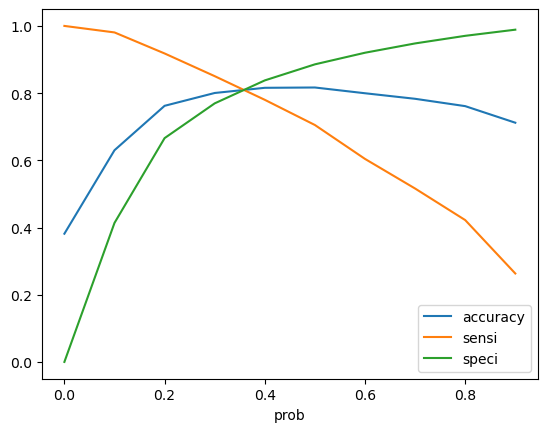

In [1126]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


As you can see that around 0.35, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now

In [1128]:

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)


In [1129]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1, inplace= True)

In [1130]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.052736,302,0
1,0,0.022184,6087,0
2,0,0.223422,1033,0
3,0,0.158081,7656,0
4,1,0.755206,3241,1


In [1131]:
#assiging the 'lead_score' based on 'converted_prob'
y_train_pred_final['Lead_Score']=y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))

In [1132]:
#selecting only imp columns
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.052736,302,0,5
1,0,0.022184,6087,0,2
2,0,0.223422,1033,0,22
3,0,0.158081,7656,0,16
4,1,0.755206,3241,1,76


**model evaluation**

In [1134]:
#confusion metrix
from sklearn import metrics
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [1135]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8153386767248153

In [1136]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1137]:
#checking sensitivity
TP/float(TP+FN)

0.764003294892916

In [1138]:
#calculate specificity
TN/float(TN+FP)

0.8470139771283355

**precision and recall**

In [1140]:
#precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7549857549857549

In [1141]:
#recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.764003294892916

In [1142]:
from sklearn.metrics import precision_score, recall_score

In [1143]:
#calculating precision value
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7549857549857549

In [1144]:
#calculating recall value
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.764003294892916

In [1145]:
#Accuracy=81%
#sensitivity= 76%
#specificity= 84%
#pricision= 75%
#recall= 76%

In [1146]:
#plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [1147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

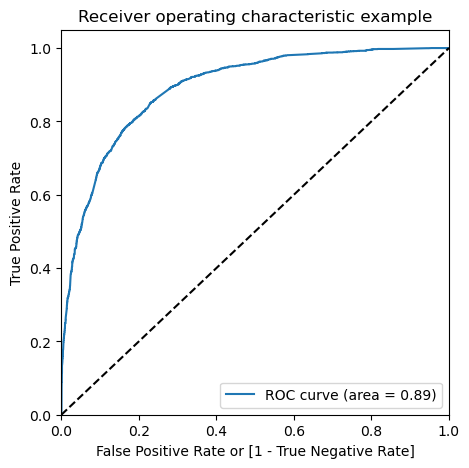

In [1148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [1149]:
#we are getting a good value of 0.89 indicating a good predictive model

**Precision and recall tradeoff**

In [1151]:
from sklearn.metrics import precision_recall_curve

In [1152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

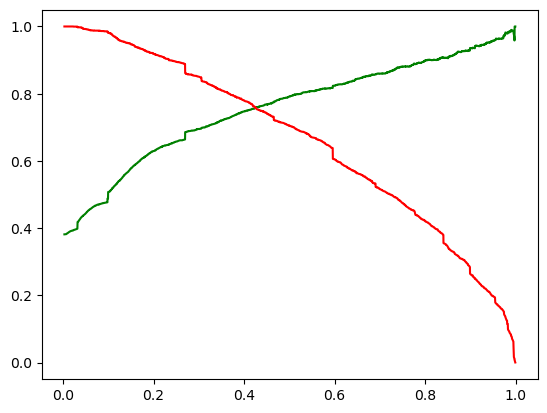

In [1153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

from the above precision-recall curve we can see that cutoff point is 0.42

In [1155]:
#plotting the train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score,final_predicted_2
0,0,0.052736,302,0,5,0
1,0,0.022184,6087,0,2,0
2,0,0.223422,1033,0,22,0
3,0,0.158081,7656,0,16,0
4,1,0.755206,3241,1,76,1


In [1156]:
#confusion matrix
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2 )
confusion_2

array([[3333,  602],
       [ 573, 1855]], dtype=int64)

In [1157]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8153386767248153

In [1158]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [1159]:
#checking sensitivity
TP/float(TP+FN)

0.764003294892916

In [1160]:
#calculate specificity
TN/float(TN+FP)

0.8470139771283355

In [1161]:
#positive predictive value
TP/float(TP+FP)

0.7549857549857549

In [1162]:
#negative predictive value
TN/float(TN+FN)

0.8533026113671275

In [1163]:
#precision
confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7549857549857549

In [1164]:
#recall
confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])


0.764003294892916

true positive number has decrease and true negative number has increase. 
thus, we cannot  use precision recall trade off method  as it reduced true positive so recall/sensitivity decreased for  this point 
we have to increase sensitivity  recall value to increase True Positives. thus we will use 0.35 as optimal cutoff point

**Making Predictions on the Test Set**

In [1167]:
#applying 'tranform' to scale the test data set
X_test[['TotalVisits','Total Time Spent on Website',' Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [1168]:
#predicting using values used by the final model logm3
test_col= X_train_sm3.columns

X_test= X_test[test_col[1:]]
#adding constant to test dataset
X_test= sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2727 entries, 6906 to 6219
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2727 non-null   float64
 1   Lead Origin_Landing Page Submission                   2727 non-null   int32  
 2   Lead Origin_Lead Add Form                             2727 non-null   int32  
 3   Lead Source_Olark Chat                                2727 non-null   int32  
 4   Lead Source_Welingak Website                          2727 non-null   int32  
 5   Last Activity_Olark Chat Conversation                 2727 non-null   int32  
 6   Last Activity_SMS Sent                                2727 non-null   int32  
 7   Last Activity_Unsubscribed                            2727 non-null   int32  
 8   Specialization_Hospitality Management                 2727 n

In [1169]:
#predicting on test data set using final model
y_test_pred = logm3.predict(X_test)

In [1170]:
y_test_pred[:10]

6906    0.902169
1873    0.217565
771     0.111703
4495    0.131373
9061    0.533214
4929    0.505977
2308    0.065109
1034    0.105056
9033    0.110711
7008    0.914124
dtype: float64

In [1171]:
## Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [1172]:
# Let's see the head

y_pred_1.head()

,0
6906,0.902169
1873,0.217565
771,0.111703
4495,0.131373
9061,0.533214


In [1173]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1174]:
#putting prospect ID to index
y_test_df['Prospect_ID']= y_test_df.index

In [1175]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1176]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1177]:
# Checking 'y_pred_final'

y_pred_final.head()

,Converted,Prospect_ID,0
0,1,6906,0.902169
1,0,1873,0.217565
2,0,771,0.111703
3,0,4495,0.131373
4,1,9061,0.533214


In [1178]:
#renaming the column'0' as 'Converted_Prob'
y_pred_final= y_pred_final.rename(columns={0:'Converted_Prob'})

In [1179]:
# Making predictions on the test set using 0.35 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [1180]:
y_pred_final.head()

,Converted,Prospect_ID,Converted_Prob,final_predicted
0,1,6906,0.902169,1
1,0,1873,0.217565,0
2,0,771,0.111703,0
3,0,4495,0.131373,0
4,1,9061,0.533214,1


In [1181]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8049138247158049

In [1182]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1331,  329],
       [ 203,  864]], dtype=int64)

In [1183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1184]:
#checking sensitivity
TP/float(TP+FN)

0.8097469540768509

In [1185]:
#calculate specificity
TN/float(TN+FP)

0.8018072289156627

In [1186]:
#calculating precision value
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7549857549857549

In [1187]:
#calculating recall value
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.764003294892916

the sensitivity value for test data is 80% while for train data is 76%. the acuuracy value is~80%. which shows that model is
performing well for test data set also.